<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/Chapter03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학과 규제

농어의 무게 구하기 문제

데이터 셋은 'https://bit.ly/perch_csv' 와 'https://bit.ly/perch_data'를 사용

chapter03_02 까지 **K-최근접 이웃 회귀**, **선형 회귀**, **다항 회귀**를 사용했지만 

과대적합과 과소적합 문제가 남아있었다. 이를 해결하기 위한 방법을 학습하겠다.
*   여러가지 특성을 사용한 다중 회귀를 학습
*   sklearn이 제공하는 여러 변환기 학습
*   과대적합 해결 방법
  *   Ridge Regression
  *   Lasso Regression














##데이터 준비

In [1]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv')
perch_data=df.to_numpy()
print(perch_data[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(perch_data,perch_weight,random_state=42)

In [4]:
print(x_train[:5],'\n',y_train[:5])

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]] 
 [ 85. 135.  78.  70. 700.]


##Sklearn의 변환기

sklearn의 변환기로 PolynomialFeatures와 StandardScalar를 사용하겠다.

sklearn의 변환기 클래스는 모두 **fit()**, **transform()** 메소드를 제공한다.

PolynomialFeatures의 옵션으로 **include_bias=False**를 하면 절편항이 나오지않는다.


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)
poly.fit(x_train)
x_train_poly=poly.transform(x_train)
x_test_poly=poly.transform(x_test)
print(x_train_poly.shape)
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

x0: 첫번째 특성 

x0^2: 첫번째 특성의 제곱항 

x0x1: 첫번째 특성과 두번째특성의 곱셈항

**항상 train_set을 기준으로 test_set를 변환하는 습관기르기.**

## Multiple Regression Model : 다중회귀

sklearn의 **LinearRegression** 은 **선형회귀**, **다항회귀**, **다중회귀** 모두를 지원한다.

PolynomialFeatures를 이용한 train_set을 가지고 모형을 학습한다.(**degree=2,default**)



In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
print('train_set의 R^2:',lr.score(x_train_poly,y_train))
print('test_set의 R^2:',lr.score(x_test_poly,y_test))

train_set의 R^2: 0.9903183436982124
test_set의 R^2: 0.9714559911594132


이번에는 PolynomialFeatures의 **degree를 5**로 수정하여 변환 후 모형을 학습한다.


In [7]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(x_train)
x_train_poly=poly.transform(x_train)
x_test_poly=poly.transform(x_test)
print(x_train_poly.shape)



(42, 55)


In [8]:
lr.fit(x_train_poly,y_train)
print('train_set의 R^2:',lr.score(x_train_poly,y_train))
print('test_set의 R^2:',lr.score(x_test_poly,y_test))

train_set의 R^2: 0.9999999999991096
test_set의 R^2: -144.40579242335605


train_set의 점수를 보면 거의 완벽에 가까운 학습이지만,

test_set의 점수를 보면 음수가 나왔다.

특성의 개수를 크게 늘리면 train_set에 대해서 너무 과대적합되어서 

test_set에서 유의미한 결과를 얻을 수 없다.

## Regularization

**규제는 ML모델이 train_set을 과대적합되지 않도록 만든다.**

선형 회귀 모델의 경우 **특성에 곱해지는 계수의 크기를 작게 만드는 일**.

계수의 크기를 작게하기 전에 scale을 조정하여 진행한다.

이때 sklearn의 **StandardScalar** 변환기를 이용하여 scale 조정을 한다.

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train_poly)
x_train_scaled=ss.transform(x_train_poly)
x_test_scaled=ss.transform(x_test_poly)
print(x_train_scaled[:5])

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 -0.76472563 -0.7717585  -0.77238267
  -0.7747325  -0.77298293 -0.76716811 -0.76291014 -0.76770896 -0.77117372
  -0.7701438  -0.77242144 -0.77168016 -0.7701077  -0.7710676  -0.76852551
  -0.76268353 -0.74414953 -0.74888304 -0.75336339 -0.75182759 -0.75602974
  -0.75767358 -0.752762

###Ridge Regression

계수를 제곱한 값을 기준으로 규제를 적용

alpha 매개변수로 **규제의 강도**를 조절. alpha 값이 **클**수록 **규제가 세지며**, **default=1**


In [10]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
print('train_set의 R^2 : ',ridge.score(x_train_scaled,y_train))
print('test_set의 R^2 : ',ridge.score(x_test_scaled,y_test))

train_set의 R^2 :  0.9896101671037343
test_set의 R^2 :  0.9790693977615398


alpha 값이 **크면** 규제 강도가 세지므로 **계수 값을 줄여 과소적합되도록 유도**.

alpha 값이 **작으면** 계수를 줄이는 역할이 줄어들고 **과대적합될 가능성이 큼**.

적절한 alpha를 찾기 위해 alpha 값에 대한 R^2 그래프 그려보기.

In [11]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha=[0.001,0.01,0.1,1,10,100]
for a in alpha:
  ridge=Ridge(alpha=a)
  ridge.fit(x_train_scaled,y_train)
  train_score.append(ridge.score(x_train_scaled,y_train))
  test_score.append(ridge.score(x_test_scaled,y_test))

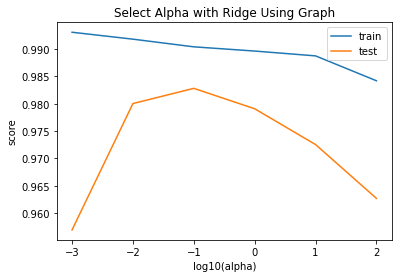

In [12]:
plt.plot(np.log10(alpha),train_score,label='train')
plt.plot(np.log10(alpha),test_score,label='test')
plt.xlabel('log10(alpha)')
plt.ylabel('score')
plt.legend(loc='best')
plt.title('Select Alpha with Ridge Using Graph')
plt.show()

반복문을 통해 여러가지 alpha를 통한 점수를 리스트에 저장하고, 그래프를 통해 표현한다.

그래프의 **왼쪽을 보면 과대적합**을 보이고, 그래프의 **오른쪽을 보면 과소적합으로 가는 추세**를 보인다.

**적절한 alpha는 두 그래프가 가장 가깝고 test_set 점수가 가장 높은 -1즉 0.1이다.**



In [13]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train_scaled,y_train)
print('train_set의 R^2 with Ridge  : ',ridge.score(x_train_scaled,y_train))
print('test_set의 R^2 with Ridge  : ',ridge.score(x_test_scaled,y_test))

train_set의 R^2 with Ridge  :  0.9903815817570366
test_set의 R^2 with Ridge  :  0.9827976465386927


###Lasso Regression

계수의 절댓값을 기준으로 규제를 적용

일반적으로 **Ridge를 더 선호**하고 두 알고리즘 모두 계수의 크기를 줄이지만,

**Lasso는 계수를 0으로 만들 수 도 있다.**


Lasso는 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 **좌표하강법**을 사용

**alpha**와 **random_state** 매개변수는 Ridge와 동일

**max_iter**는 알고리즘의 수행 반복 횟수 지정, **default=1000**

In [14]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
print('train_set의 R^2 with Lasso: ',lasso.score(x_train_scaled,y_train))
print('test_set의 R^2 with Lasso : ',lasso.score(x_test_scaled,y_test))


train_set의 R^2 with Lasso:  0.9897898972080961
test_set의 R^2 with Lasso :  0.9800593698421883


In [15]:
train_score=[]
test_score=[]

alpha=[0.001,0.01,0.1,1,10,100]
for a in alpha:
  lasso=Lasso(alpha=a,max_iter=10000)
  lasso.fit(x_train_scaled,y_train)
  train_score.append(lasso.score(x_train_scaled,y_train))
  test_score.append(lasso.score(x_test_scaled,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


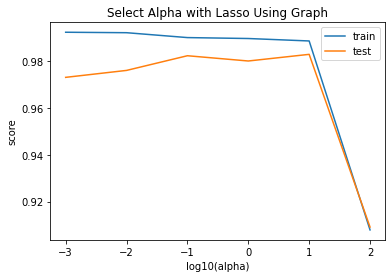

In [16]:
plt.plot(np.log10(alpha),train_score,label='train')
plt.plot(np.log10(alpha),test_score,label='test')
plt.xlabel('log10(alpha)')
plt.ylabel('score')
plt.legend(loc='best')
plt.title('Select Alpha with Lasso Using Graph')
plt.show()

Lasso 그래프도 Ridge 그래프와 비슷하게 **왼쪽에서는 과대적합**을 보여준다.

**오른쪽으로 갈수록 train_set과 test_set의 격차가 줄어들고**

**가장 오른쪽**은 두 점수 모두 떨어지면 **과소적합**을 보인다.

적절한 alpha로 1, 즉 10을 선택하여 모델링을 하겠다.

In [17]:
lasso=Lasso(alpha=10)
lasso.fit(x_train_scaled,y_train)
print('train_set의 R^2 with Lasso: ',lasso.score(x_train_scaled,y_train))
print('test_set의 R^2 with Lasso : ',lasso.score(x_test_scaled,y_test))


train_set의 R^2 with Lasso:  0.9888067471131867
test_set의 R^2 with Lasso :  0.9824470598706695


Lasso 모형의 계수는 coef_에 저장되어있다.

위 모형에서 0이된 계수의 개수를 찾아보자.

In [18]:
print(np.sum(lasso.coef_==0))

40


Lasso모형 계수가 **0**인 것의 합이 **40**이므로 총 **55**개의 polynomial 특성중

모형에 사용한 특성은 **15**개가 된다.

이런 특징으로 **Lasso 모델은 유용한 특성을 고르는 용도로 사용이 가능하다**.